In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def clahe_preprocessing(img):
    red, green, blue = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
    op_red, op_green, op_blue = clahe.apply(red), clahe.apply(green),clahe.apply(blue)
    img_op_clahe = cv2.merge((op_red, op_green, op_blue))
    return img_op_clahe

In [3]:
source_ds = r"C:\Users\Vimal\Desktop\ML\Agrobez\CLAHE\Soybean Seeds"
destination_ds = r"C:\Users\Vimal\Desktop\ML\Agrobez\CLAHE\Preprocessed"

In [4]:
for class_name in os.listdir(source_ds):
    class_dir = os.path.join(source_ds, class_name)
    dest_class_dir = os.path.join(destination_ds+'_CLAHE', class_name)

    # Create the destination class directory if it doesn't exist
    os.makedirs(dest_class_dir, exist_ok=True)

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            equ_img = clahe_preprocessing(img)
            dest_img_path = os.path.join(dest_class_dir, img_name)
            cv2.imwrite(dest_img_path, equ_img)

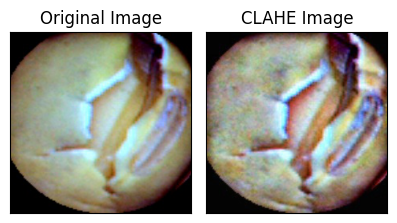

In [8]:
import matplotlib.pyplot as plt

output = ['original.jpg', 'clahe.jpg']
titles = ['Original Image', 'CLAHE Image']

plt.figure(figsize=(8, 4)) 

for i in range(2):
    plt.subplot(1, 4, i + 1)  
    image = plt.imread(output[i])  
    plt.imshow(image)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout() 
plt.show()